In [11]:
import scipy.io
import numpy as np
import pandas as pd
import matplotlib
%matplotlib widget
import matplotlib.pyplot as plt
from utilities import normalize

mat = scipy.io.loadmat('data/messung_part1neuneu')
F = 1/(mat["data_1"][0][1]-mat["data_1"][0][0])

In [12]:
start_t = 100000
stop_t = 700000
step = 10
valid_quote = 0.2


u1 = mat["data_1"][4][start_t:stop_t:step]
u1, u1_s, u1_o = normalize(u1)
u2 = mat["data_1"][1][start_t:stop_t:step]
u2, u2_s, u2_o = normalize(u2)
y = mat["data_1"][3][start_t:stop_t:step]
y, y_s, y_o = normalize(y)

# Remove Jumps from u1, so step height is only learned from u2

# Distance from Jump in u2 to start of creep in u1
step_offset = 100

jumps = np.nonzero(np.diff(u2))
for i in np.nditer(jumps):
    u1[i:i+step_offset] = u1[i+step_offset]
    u1[i:] = u1[i:] - (u1[i+step_offset]-u1[i-1])

# Split Data into Validation and Training 
u1_t = u1[int(valid_quote*u1.size):]
u1_v = u1[:int(valid_quote*u1.size)]

u2_t = u2[int(valid_quote*u2.size):]
u2_v = u2[:int(valid_quote*u2.size)]

y_t = y[int(valid_quote*y.size):]
y_v = y[:int(valid_quote*y.size)]


In [13]:
jumps = np.nonzero(np.diff(u2_t))
iter = np.nditer(jumps)
print(jumps)
for idx, value in enumerate(iter):
    u1_t[value:value+100] = u1_t[value+100]
    u1_t[value:] = u1_t[value:] - (u1_t[value+100]-u1_t[value-1])

(array([ 4025, 16025, 28025, 40025], dtype=int64),)


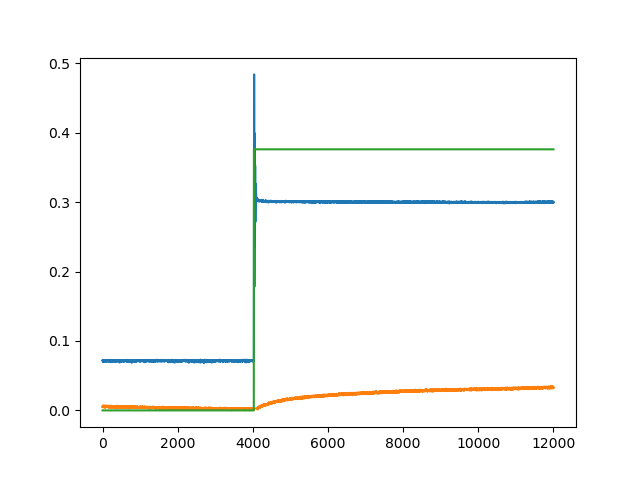

In [14]:
plt.plot(y_v)
plt.plot(u1_v)
plt.plot(u2_v)
# plt.plot(y_t)
# plt.plot(u1_t)
# plt.plot(u2_t)
plt.show()

In [15]:
scipy.io.savemat('data/miso_nosteps.mat', { "u1_t": u1_t, "u2_t": u2_t, "y_t": y_t,
                                    "u1_v": u1_v, "u2_v": u2_v, "y_v": y_v,
                                    "u1_o": u1_o, "u2_o": u2_o, "y_o": y_o,
                                    "u1_s": u1_s, "u2_s": u2_s, "y_s": y_s,
                                    })